In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
env_name = 'CustomCartPole-v0'
env_str="cartpole"
figfilenamehead = "fig_policy_evaluation_cartpole_"

num_iter_max=10000
vae_lr=5e-4

seed = 0


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 2
print(s_dim, a_dim, z_dim)

# print(np.random.randn())
# print(torch.randn(1))

4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(6775.2891)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

train_vae: enc_dec
train: iter 0  trainloss 672.45059  validloss 1050.09350±0.00000  bestvalidloss 1050.09350  last_update 0
train: iter 1  trainloss 147.35522  validloss 474.31043±0.00000  bestvalidloss 474.31043  last_update 0
train: iter 2  trainloss -188.89792  validloss 61.32985±0.00000  bestvalidloss 61.32985  last_update 0
train: iter 3  trainloss -447.25883  validloss -159.40684±0.00000  bestvalidloss -159.40684  last_update 0
train: iter 4  trainloss -618.24016  validloss -320.55755±0.00000  bestvalidloss -320.55755  last_update 0
train: iter 5  trainloss -777.81647  validloss -501.28083±0.00000  bestvalidloss -501.28083  last_update 0
train: iter 6  trainloss -875.18149  validloss -542.31085±0.00000  bestvalidloss -542.31085  last_update 0
train: iter 7  trainloss -951.15372  validloss -765.06280±0.00000  bestvalidloss -765.06280  last_update 0
train: iter 8  trainloss -1030.11993  validloss -834.99042±0.00000  bestvalidloss -834.99042  last_update 0
train: iter 9  trainloss 

train: iter 76  trainloss -1861.02898  validloss -1815.31055±0.00000  bestvalidloss -1815.31055  last_update 0
train: iter 77  trainloss -1799.18858  validloss -1670.61552±0.00000  bestvalidloss -1815.31055  last_update 1
train: iter 78  trainloss -1860.64181  validloss -1811.90768±0.00000  bestvalidloss -1815.31055  last_update 2
train: iter 79  trainloss -1877.42610  validloss -1809.83046±0.00000  bestvalidloss -1815.31055  last_update 3
train: iter 80  trainloss -1851.09617  validloss -1775.36255±0.00000  bestvalidloss -1815.31055  last_update 4
train: iter 81  trainloss -1817.29247  validloss -1752.87663±0.00000  bestvalidloss -1815.31055  last_update 5
train: iter 82  trainloss -1828.90306  validloss -1591.97860±0.00000  bestvalidloss -1815.31055  last_update 6
train: iter 83  trainloss -1879.75497  validloss -1815.78613±0.00000  bestvalidloss -1815.78613  last_update 0
train: iter 84  trainloss -1875.40497  validloss -1813.55733±0.00000  bestvalidloss -1815.78613  last_update 1
t

train: iter 150  trainloss -2083.94631  validloss -2036.76771±0.00000  bestvalidloss -2074.52473  last_update 3
train: iter 151  trainloss -1955.72265  validloss -1996.43982±0.00000  bestvalidloss -2074.52473  last_update 4
train: iter 152  trainloss -2085.00566  validloss -1990.76064±0.00000  bestvalidloss -2074.52473  last_update 5
train: iter 153  trainloss -2120.98721  validloss -2059.95657±0.00000  bestvalidloss -2074.52473  last_update 6
train: iter 154  trainloss -2089.38387  validloss -2065.09089±0.00000  bestvalidloss -2074.52473  last_update 7
train: iter 155  trainloss -1877.97910  validloss -1882.68853±0.00000  bestvalidloss -2074.52473  last_update 8
train: iter 156  trainloss -2076.95949  validloss -2005.58424±0.00000  bestvalidloss -2074.52473  last_update 9
train: iter 157  trainloss -2072.00869  validloss -1978.39995±0.00000  bestvalidloss -2074.52473  last_update 10
train: iter 158  trainloss -2123.13775  validloss -2061.71045±0.00000  bestvalidloss -2074.52473  last_

train: iter 224  trainloss -2156.19170  validloss -2089.61617±0.00000  bestvalidloss -2148.77823  last_update 7
train: iter 225  trainloss -1808.34113  validloss -2065.10311±0.00000  bestvalidloss -2148.77823  last_update 8
train: iter 226  trainloss -2113.34507  validloss -1956.22315±0.00000  bestvalidloss -2148.77823  last_update 9
train: iter 227  trainloss -2167.63025  validloss -2091.93611±0.00000  bestvalidloss -2148.77823  last_update 10
train: iter 228  trainloss -2173.75998  validloss -2119.99302±0.00000  bestvalidloss -2148.77823  last_update 11
train: iter 229  trainloss -2188.40907  validloss -2143.11258±0.00000  bestvalidloss -2148.77823  last_update 12
train: iter 230  trainloss -2135.00846  validloss -2143.68273±0.00000  bestvalidloss -2148.77823  last_update 13
train: iter 231  trainloss -2157.53727  validloss -2115.36561±0.00000  bestvalidloss -2148.77823  last_update 14
train: iter 232  trainloss -2155.76074  validloss -2131.21189±0.00000  bestvalidloss -2148.77823  l

train: iter 297  trainloss -2111.05498  validloss -2142.22634±0.00000  bestvalidloss -2184.94150  last_update 9
train: iter 298  trainloss -2159.59117  validloss -2097.09366±0.00000  bestvalidloss -2184.94150  last_update 10
train: iter 299  trainloss -2170.26892  validloss -2074.67956±0.00000  bestvalidloss -2184.94150  last_update 11
train: iter 300  trainloss -2133.91374  validloss -2129.91341±0.00000  bestvalidloss -2184.94150  last_update 12
train: iter 301  trainloss -2120.71937  validloss -2126.45934±0.00000  bestvalidloss -2184.94150  last_update 13
train: iter 302  trainloss -2151.42913  validloss -1931.56708±0.00000  bestvalidloss -2184.94150  last_update 14
train: iter 303  trainloss -2201.44228  validloss -2156.06434±0.00000  bestvalidloss -2184.94150  last_update 15
train: iter 304  trainloss -2211.93545  validloss -2184.60827±0.00000  bestvalidloss -2184.94150  last_update 16
train: iter 305  trainloss -1994.59622  validloss -2156.43662±0.00000  bestvalidloss -2184.94150 

train: iter 371  trainloss -2216.26061  validloss -2206.43206±0.00000  bestvalidloss -2215.69409  last_update 10
train: iter 372  trainloss -2153.57332  validloss -2142.27079±0.00000  bestvalidloss -2215.69409  last_update 11
train: iter 373  trainloss -2213.12742  validloss -2189.71168±0.00000  bestvalidloss -2215.69409  last_update 12
train: iter 374  trainloss -2238.01724  validloss -2220.74340±0.00000  bestvalidloss -2220.74340  last_update 0
train: iter 375  trainloss -2238.20798  validloss -2205.21506±0.00000  bestvalidloss -2220.74340  last_update 1
train: iter 376  trainloss -2236.55676  validloss -2204.40042±0.00000  bestvalidloss -2220.74340  last_update 2
train: iter 377  trainloss -2232.45394  validloss -2231.62198±0.00000  bestvalidloss -2231.62198  last_update 0
train: iter 378  trainloss -2187.33435  validloss -2184.17367±0.00000  bestvalidloss -2231.62198  last_update 1
train: iter 379  trainloss -2223.50788  validloss -2187.17612±0.00000  bestvalidloss -2231.62198  las

train: iter 445  trainloss -2238.91728  validloss -2149.39258±0.00000  bestvalidloss -2231.62198  last_update 68
train: iter 446  trainloss -2251.02716  validloss -2191.98974±0.00000  bestvalidloss -2231.62198  last_update 69
train: iter 447  trainloss -2226.66287  validloss -2226.43555±0.00000  bestvalidloss -2231.62198  last_update 70
train: iter 448  trainloss -2203.92752  validloss -2125.07932±0.00000  bestvalidloss -2231.62198  last_update 71
train: iter 449  trainloss -2226.56259  validloss -2205.97825±0.00000  bestvalidloss -2231.62198  last_update 72
train: iter 450  trainloss -2235.56807  validloss -2191.71371±0.00000  bestvalidloss -2231.62198  last_update 73
train: iter 451  trainloss -2245.59644  validloss -2137.01722±0.00000  bestvalidloss -2231.62198  last_update 74
train: iter 452  trainloss -2263.28104  validloss -2220.47122±0.00000  bestvalidloss -2231.62198  last_update 75
train: iter 453  trainloss -2234.27567  validloss -2229.03358±0.00000  bestvalidloss -2231.62198

train: iter 520  trainloss -2275.30138  validloss -2146.39859±0.00000  bestvalidloss -2257.54059  last_update 23
train: iter 521  trainloss -2302.95886  validloss -2211.08368±0.00000  bestvalidloss -2257.54059  last_update 24
train: iter 522  trainloss -2311.91867  validloss -2245.55809±0.00000  bestvalidloss -2257.54059  last_update 25
train: iter 523  trainloss -2297.27505  validloss -2253.86584±0.00000  bestvalidloss -2257.54059  last_update 26
train: iter 524  trainloss -2269.57061  validloss -2218.66729±0.00000  bestvalidloss -2257.54059  last_update 27
train: iter 525  trainloss -2260.29326  validloss -2196.70781±0.00000  bestvalidloss -2257.54059  last_update 28
train: iter 526  trainloss -2276.08019  validloss -2197.83064±0.00000  bestvalidloss -2257.54059  last_update 29
train: iter 527  trainloss -2266.04257  validloss -2208.05041±0.00000  bestvalidloss -2257.54059  last_update 30
train: iter 528  trainloss -2285.11397  validloss -2249.09457±0.00000  bestvalidloss -2257.54059

train: iter 593  trainloss -2302.49732  validloss -2224.11710±0.00000  bestvalidloss -2259.67822  last_update 4
train: iter 594  trainloss -2272.87044  validloss -2209.99670±0.00000  bestvalidloss -2259.67822  last_update 5
train: iter 595  trainloss -2258.37525  validloss -2170.94542±0.00000  bestvalidloss -2259.67822  last_update 6
train: iter 596  trainloss -2285.84112  validloss -2231.13262±0.00000  bestvalidloss -2259.67822  last_update 7
train: iter 597  trainloss -2301.60650  validloss -2216.92205±0.00000  bestvalidloss -2259.67822  last_update 8
train: iter 598  trainloss -2269.29727  validloss -2195.55449±0.00000  bestvalidloss -2259.67822  last_update 9
train: iter 599  trainloss -2300.14655  validloss -2234.16770±0.00000  bestvalidloss -2259.67822  last_update 10
train: iter 600  trainloss -2288.69660  validloss -2246.85510±0.00000  bestvalidloss -2259.67822  last_update 11
train: iter 601  trainloss -2265.49756  validloss -2203.92770±0.00000  bestvalidloss -2259.67822  last

train: iter 666  trainloss -2307.89516  validloss -2255.64945±0.00000  bestvalidloss -2263.29818  last_update 42
train: iter 667  trainloss -2296.04692  validloss -2258.02076±0.00000  bestvalidloss -2263.29818  last_update 43
train: iter 668  trainloss -2300.99898  validloss -2253.82955±0.00000  bestvalidloss -2263.29818  last_update 44
train: iter 669  trainloss -2305.43027  validloss -2235.95346±0.00000  bestvalidloss -2263.29818  last_update 45
train: iter 670  trainloss -2311.06846  validloss -2249.68958±0.00000  bestvalidloss -2263.29818  last_update 46
train: iter 671  trainloss -2304.70964  validloss -2230.36115±0.00000  bestvalidloss -2263.29818  last_update 47
train: iter 672  trainloss -2300.70011  validloss -2240.47020±0.00000  bestvalidloss -2263.29818  last_update 48
train: iter 673  trainloss -2287.25511  validloss -2256.13414±0.00000  bestvalidloss -2263.29818  last_update 49
train: iter 674  trainloss -2234.62667  validloss -2235.78938±0.00000  bestvalidloss -2263.29818

train: iter 739  trainloss -2316.84715  validloss -2235.52340±0.00000  bestvalidloss -2275.56471  last_update 18
train: iter 740  trainloss -2322.57838  validloss -2258.58354±0.00000  bestvalidloss -2275.56471  last_update 19
train: iter 741  trainloss -2321.93754  validloss -2228.51502±0.00000  bestvalidloss -2275.56471  last_update 20
train: iter 742  trainloss -2316.14052  validloss -2240.82454±0.00000  bestvalidloss -2275.56471  last_update 21
train: iter 743  trainloss -2314.62751  validloss -2235.17889±0.00000  bestvalidloss -2275.56471  last_update 22
train: iter 744  trainloss -2324.28064  validloss -2276.11749±0.00000  bestvalidloss -2276.11749  last_update 0
train: iter 745  trainloss -2323.18857  validloss -2260.24264±0.00000  bestvalidloss -2276.11749  last_update 1
train: iter 746  trainloss -2307.03297  validloss -2261.08828±0.00000  bestvalidloss -2276.11749  last_update 2
train: iter 747  trainloss -2307.78701  validloss -2243.67792±0.00000  bestvalidloss -2276.11749  l

train: iter 812  trainloss -2326.78571  validloss -2269.86644±0.00000  bestvalidloss -2279.88848  last_update 15
train: iter 813  trainloss -2290.01069  validloss -2222.80396±0.00000  bestvalidloss -2279.88848  last_update 16
train: iter 814  trainloss -2310.39505  validloss -2210.70969±0.00000  bestvalidloss -2279.88848  last_update 17
train: iter 815  trainloss -2326.44400  validloss -2263.52368±0.00000  bestvalidloss -2279.88848  last_update 18
train: iter 816  trainloss -2306.96939  validloss -2256.04324±0.00000  bestvalidloss -2279.88848  last_update 19
train: iter 817  trainloss -2291.74506  validloss -2207.91716±0.00000  bestvalidloss -2279.88848  last_update 20
train: iter 818  trainloss -2198.83487  validloss -2257.17613±0.00000  bestvalidloss -2279.88848  last_update 21
train: iter 819  trainloss -2313.15727  validloss -2171.25812±0.00000  bestvalidloss -2279.88848  last_update 22
train: iter 820  trainloss -2326.33324  validloss -2276.92504±0.00000  bestvalidloss -2279.88848

train: iter 885  trainloss -2320.61175  validloss -2253.02159±0.00000  bestvalidloss -2279.88848  last_update 88
train: iter 886  trainloss -2308.27278  validloss -2210.74432±0.00000  bestvalidloss -2279.88848  last_update 89
train: iter 887  trainloss -2325.28435  validloss -2255.07899±0.00000  bestvalidloss -2279.88848  last_update 90
train: iter 888  trainloss -2318.65527  validloss -2250.04722±0.00000  bestvalidloss -2279.88848  last_update 91
train: iter 889  trainloss -2325.84661  validloss -2248.13403±0.00000  bestvalidloss -2279.88848  last_update 92
train: iter 890  trainloss -2316.04138  validloss -2229.37606±0.00000  bestvalidloss -2279.88848  last_update 93
train: iter 891  trainloss -2304.76153  validloss -2237.75542±0.00000  bestvalidloss -2279.88848  last_update 94
train: iter 892  trainloss -2297.27522  validloss -2222.56427±0.00000  bestvalidloss -2279.88848  last_update 95
train: iter 893  trainloss -2328.14634  validloss -2269.76418±0.00000  bestvalidloss -2279.88848

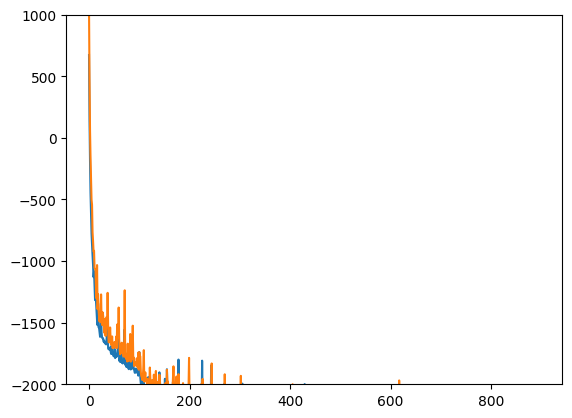

train_vae: enc
train: iter 0  trainloss -2331.77038  validloss -2279.45543±0.00000  bestvalidloss -2279.45543  last_update 0
train: iter 1  trainloss -2333.98699  validloss -2273.55413±0.00000  bestvalidloss -2279.45543  last_update 1
train: iter 2  trainloss -2331.51093  validloss -2266.34889±0.00000  bestvalidloss -2279.45543  last_update 2
train: iter 3  trainloss -2332.22314  validloss -2275.62339±0.00000  bestvalidloss -2279.45543  last_update 3
train: iter 4  trainloss -2334.06246  validloss -2266.31416±0.00000  bestvalidloss -2279.45543  last_update 4
train: iter 5  trainloss -2333.25938  validloss -2277.17491±0.00000  bestvalidloss -2279.45543  last_update 5
train: iter 6  trainloss -2329.03847  validloss -2276.12501±0.00000  bestvalidloss -2279.45543  last_update 6
train: iter 7  trainloss -2333.63433  validloss -2268.16026±0.00000  bestvalidloss -2279.45543  last_update 7
train: iter 8  trainloss -2335.06149  validloss -2276.04437±0.00000  bestvalidloss -2279.45543  last_upda

train: iter 74  trainloss -2334.71553  validloss -2270.80511±0.00000  bestvalidloss -2285.68689  last_update 59
train: iter 75  trainloss -2332.37944  validloss -2270.86321±0.00000  bestvalidloss -2285.68689  last_update 60
train: iter 76  trainloss -2333.78048  validloss -2268.57369±0.00000  bestvalidloss -2285.68689  last_update 61
train: iter 77  trainloss -2334.16186  validloss -2273.50429±0.00000  bestvalidloss -2285.68689  last_update 62
train: iter 78  trainloss -2333.82283  validloss -2265.09505±0.00000  bestvalidloss -2285.68689  last_update 63
train: iter 79  trainloss -2334.06823  validloss -2264.71989±0.00000  bestvalidloss -2285.68689  last_update 64
train: iter 80  trainloss -2335.03179  validloss -2277.99792±0.00000  bestvalidloss -2285.68689  last_update 65
train: iter 81  trainloss -2333.49649  validloss -2277.78547±0.00000  bestvalidloss -2285.68689  last_update 66
train: iter 82  trainloss -2333.84556  validloss -2273.86155±0.00000  bestvalidloss -2285.68689  last_up

train: iter 32  trainloss -2300.51797  validloss -2247.46729±0.00000  bestvalidloss -2286.29103  last_update 2
train: iter 33  trainloss -2323.81201  validloss -2262.84482±0.00000  bestvalidloss -2286.29103  last_update 3
train: iter 34  trainloss -2318.75276  validloss -2249.03922±0.00000  bestvalidloss -2286.29103  last_update 4
train: iter 35  trainloss -2323.14821  validloss -2274.51710±0.00000  bestvalidloss -2286.29103  last_update 5
train: iter 36  trainloss -2325.61621  validloss -2260.57845±0.00000  bestvalidloss -2286.29103  last_update 6
train: iter 37  trainloss -2323.82849  validloss -2263.08670±0.00000  bestvalidloss -2286.29103  last_update 7
train: iter 38  trainloss -2322.42509  validloss -2260.24221±0.00000  bestvalidloss -2286.29103  last_update 8
train: iter 39  trainloss -2320.27233  validloss -2218.72736±0.00000  bestvalidloss -2286.29103  last_update 9
train: iter 40  trainloss -2330.05018  validloss -2261.69507±0.00000  bestvalidloss -2286.29103  last_update 10


train: iter 106  trainloss -2320.16764  validloss -2256.15135±0.00000  bestvalidloss -2291.37305  last_update 16
train: iter 107  trainloss -2319.85713  validloss -2253.92296±0.00000  bestvalidloss -2291.37305  last_update 17
train: iter 108  trainloss -2326.89343  validloss -2262.10480±0.00000  bestvalidloss -2291.37305  last_update 18
train: iter 109  trainloss -2320.31242  validloss -2257.82755±0.00000  bestvalidloss -2291.37305  last_update 19
train: iter 110  trainloss -2305.19121  validloss -2242.20540±0.00000  bestvalidloss -2291.37305  last_update 20
train: iter 111  trainloss -2296.27237  validloss -2245.16168±0.00000  bestvalidloss -2291.37305  last_update 21
train: iter 112  trainloss -2326.01039  validloss -2248.36603±0.00000  bestvalidloss -2291.37305  last_update 22
train: iter 113  trainloss -2326.78661  validloss -2248.05809±0.00000  bestvalidloss -2291.37305  last_update 23
train: iter 114  trainloss -2319.30466  validloss -2275.22170±0.00000  bestvalidloss -2291.37305

train: iter 179  trainloss -2328.05743  validloss -2266.36227±0.00000  bestvalidloss -2291.37305  last_update 89
train: iter 180  trainloss -2324.55078  validloss -2280.06309±0.00000  bestvalidloss -2291.37305  last_update 90
train: iter 181  trainloss -2323.09524  validloss -2248.62274±0.00000  bestvalidloss -2291.37305  last_update 91
train: iter 182  trainloss -2332.88215  validloss -2276.46876±0.00000  bestvalidloss -2291.37305  last_update 92
train: iter 183  trainloss -2331.04760  validloss -2244.26520±0.00000  bestvalidloss -2291.37305  last_update 93
train: iter 184  trainloss -2331.53305  validloss -2281.97987±0.00000  bestvalidloss -2291.37305  last_update 94
train: iter 185  trainloss -2328.74565  validloss -2271.53121±0.00000  bestvalidloss -2291.37305  last_update 95
train: iter 186  trainloss -2323.70399  validloss -2254.26042±0.00000  bestvalidloss -2291.37305  last_update 96
train: iter 187  trainloss -2320.45454  validloss -2272.28881±0.00000  bestvalidloss -2291.37305

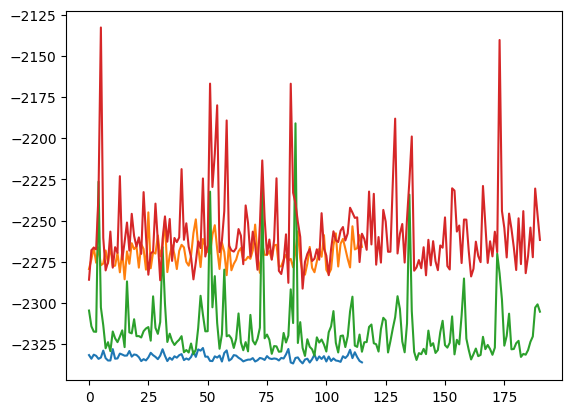

In [7]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()



In [8]:

# vi.update_mulogvar_offlinedata()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 5.09370  validloss 5.31407±0.00000  bestvalidloss 5.31407  last_update 0
train: iter 1  trainloss 4.70624  validloss 4.87917±0.00000  bestvalidloss 4.87917  last_update 0
train: iter 2  trainloss 4.39611  validloss 4.53029±0.00000  bestvalidloss 4.53029  last_update 0
train: iter 3  trainloss 4.13014  validloss 4.25307±0.00000  bestvalidloss 4.25307  last_update 0
train: iter 4  trainloss 3.91912  validloss 4.01723±0.00000  bestvalidloss 4.01723  last_update 0
train: iter 5  trainloss 3.71453  validloss 3.80597±0.00000  bestvalidloss 3.80597  last_update 0
train: iter 6  trainloss 3.54121  validloss 3.63412±0.00000  bestvalidloss 3.63412  last_update 0
train: iter 7  trainloss 3.37785  validloss 3.45650±0.00000  bestvalidloss 3.45650  last_update 0
train: iter 8  trainloss 3.22384  validloss 3.29560±0.00000  bestvalidloss 3.29560  last_update 0
train: iter 9  trainloss 3.07742  validloss 3.15443±0.00000  bestvalidloss 3.15443  last_update 0
train: iter 10  trai

train: iter 90  trainloss -1.84748  validloss -2.21318±0.00000  bestvalidloss -2.24099  last_update 1
train: iter 91  trainloss -1.84318  validloss -2.19583±0.00000  bestvalidloss -2.24099  last_update 2
train: iter 92  trainloss -1.93950  validloss -2.27665±0.00000  bestvalidloss -2.27665  last_update 0
train: iter 93  trainloss -1.92260  validloss -2.27664±0.00000  bestvalidloss -2.27665  last_update 1
train: iter 94  trainloss -1.92250  validloss -2.33335±0.00000  bestvalidloss -2.33335  last_update 0
train: iter 95  trainloss -1.93813  validloss -2.23971±0.00000  bestvalidloss -2.33335  last_update 1
train: iter 96  trainloss -1.93888  validloss -2.27377±0.00000  bestvalidloss -2.33335  last_update 2
train: iter 97  trainloss -1.88794  validloss -2.29414±0.00000  bestvalidloss -2.33335  last_update 3
train: iter 98  trainloss -1.90236  validloss -2.37314±0.00000  bestvalidloss -2.37314  last_update 0
train: iter 99  trainloss -1.94796  validloss -2.34935±0.00000  bestvalidloss -2.3

train: iter 185  trainloss -1.90825  validloss -2.38834±0.00000  bestvalidloss -2.48406  last_update 64
train: iter 186  trainloss -1.90461  validloss -2.46246±0.00000  bestvalidloss -2.48406  last_update 65
train: iter 187  trainloss -1.91873  validloss -2.40619±0.00000  bestvalidloss -2.48406  last_update 66
train: iter 188  trainloss -1.92152  validloss -2.45105±0.00000  bestvalidloss -2.48406  last_update 67
train: iter 189  trainloss -1.93534  validloss -2.39129±0.00000  bestvalidloss -2.48406  last_update 68
train: iter 190  trainloss -1.94606  validloss -2.40982±0.00000  bestvalidloss -2.48406  last_update 69
train: iter 191  trainloss -1.95133  validloss -2.44528±0.00000  bestvalidloss -2.48406  last_update 70
train: iter 192  trainloss -1.97889  validloss -2.44244±0.00000  bestvalidloss -2.48406  last_update 71
train: iter 193  trainloss -1.95640  validloss -2.35352±0.00000  bestvalidloss -2.48406  last_update 72
train: iter 194  trainloss -1.94149  validloss -2.41094±0.00000 

train: iter 280  trainloss -1.89232  validloss -2.40054±0.00000  bestvalidloss -2.52105  last_update 76
train: iter 281  trainloss -1.96776  validloss -2.38153±0.00000  bestvalidloss -2.52105  last_update 77
train: iter 282  trainloss -1.95628  validloss -2.34938±0.00000  bestvalidloss -2.52105  last_update 78
train: iter 283  trainloss -1.89160  validloss -2.37120±0.00000  bestvalidloss -2.52105  last_update 79
train: iter 284  trainloss -1.92792  validloss -2.45026±0.00000  bestvalidloss -2.52105  last_update 80
train: iter 285  trainloss -1.90299  validloss -2.44632±0.00000  bestvalidloss -2.52105  last_update 81
train: iter 286  trainloss -1.98879  validloss -2.41802±0.00000  bestvalidloss -2.52105  last_update 82
train: iter 287  trainloss -1.96797  validloss -2.44294±0.00000  bestvalidloss -2.52105  last_update 83
train: iter 288  trainloss -1.96293  validloss -2.29750±0.00000  bestvalidloss -2.52105  last_update 84
train: iter 289  trainloss -1.93755  validloss -2.34032±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.2986, -2.2926, -4.5124, -5.0551], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)

train: iter 0  trainloss 124.73846  validloss 131.44770±0.00000  bestvalidloss 131.44770  last_update 0
train: iter 1  trainloss 94.03722  validloss 105.59964±0.00000  bestvalidloss 105.59964  last_update 0
train: iter 2  trainloss 69.79866  validloss 75.94842±0.00000  bestvalidloss 75.94842  last_update 0
train: iter 3  trainloss 55.21129  validloss 58.40555±0.00000  bestvalidloss 58.40555  last_update 0
train: iter 4  trainloss 44.26203  validloss 46.44049±0.00000  bestvalidloss 46.44049  last_update 0
train: iter 5  trainloss 35.48895  validloss 37.08230±0.00000  bestvalidloss 37.08230  last_update 0
train: iter 6  trainloss 28.62122  validloss 29.26647±0.00000  bestvalidloss 29.26647  last_update 0
train: iter 7  trainloss 22.89415  validloss 23.64383±0.00000  bestvalidloss 23.64383  last_update 0
train: iter 8  trainloss 18.22400  validloss 18.89261±0.00000  bestvalidloss 18.89261  last_update 0
train: iter 9  trainloss 14.47144  validloss 14.77640±0.00000  bestvalidloss 14.77640 

train: iter 83  trainloss 0.80146  validloss 1.47611±0.00000  bestvalidloss 1.36609  last_update 9
train: iter 84  trainloss 0.79309  validloss 1.33131±0.00000  bestvalidloss 1.33131  last_update 0
train: iter 85  trainloss 0.79937  validloss 1.50962±0.00000  bestvalidloss 1.33131  last_update 1
train: iter 86  trainloss 0.79811  validloss 1.46368±0.00000  bestvalidloss 1.33131  last_update 2
train: iter 87  trainloss 0.78201  validloss 1.40274±0.00000  bestvalidloss 1.33131  last_update 3
train: iter 88  trainloss 0.79945  validloss 1.37740±0.00000  bestvalidloss 1.33131  last_update 4
train: iter 89  trainloss 0.78689  validloss 1.42888±0.00000  bestvalidloss 1.33131  last_update 5
train: iter 90  trainloss 0.79590  validloss 1.44138±0.00000  bestvalidloss 1.33131  last_update 6
train: iter 91  trainloss 0.80294  validloss 1.52607±0.00000  bestvalidloss 1.33131  last_update 7
train: iter 92  trainloss 0.79083  validloss 1.43908±0.00000  bestvalidloss 1.33131  last_update 8
train: ite

train: iter 165  trainloss 0.67141  validloss 1.19167±0.00000  bestvalidloss 1.19167  last_update 0
train: iter 166  trainloss 0.67073  validloss 1.39564±0.00000  bestvalidloss 1.19167  last_update 1
train: iter 167  trainloss 0.67365  validloss 1.22549±0.00000  bestvalidloss 1.19167  last_update 2
train: iter 168  trainloss 0.67601  validloss 1.32666±0.00000  bestvalidloss 1.19167  last_update 3
train: iter 169  trainloss 0.66921  validloss 1.21369±0.00000  bestvalidloss 1.19167  last_update 4
train: iter 170  trainloss 0.67397  validloss 1.21951±0.00000  bestvalidloss 1.19167  last_update 5
train: iter 171  trainloss 0.68050  validloss 1.30599±0.00000  bestvalidloss 1.19167  last_update 6
train: iter 172  trainloss 0.67096  validloss 1.35339±0.00000  bestvalidloss 1.19167  last_update 7
train: iter 173  trainloss 0.66920  validloss 1.25118±0.00000  bestvalidloss 1.19167  last_update 8
train: iter 174  trainloss 0.67655  validloss 1.36917±0.00000  bestvalidloss 1.19167  last_update 9


train: iter 249  trainloss 0.65816  validloss 1.38301±0.00000  bestvalidloss 1.14528  last_update 60
train: iter 250  trainloss 0.66404  validloss 1.27769±0.00000  bestvalidloss 1.14528  last_update 61
train: iter 251  trainloss 0.66989  validloss 1.34703±0.00000  bestvalidloss 1.14528  last_update 62
train: iter 252  trainloss 0.66133  validloss 1.18455±0.00000  bestvalidloss 1.14528  last_update 63
train: iter 253  trainloss 0.66930  validloss 1.18568±0.00000  bestvalidloss 1.14528  last_update 64
train: iter 254  trainloss 0.66242  validloss 1.28317±0.00000  bestvalidloss 1.14528  last_update 65
train: iter 255  trainloss 0.66421  validloss 1.31663±0.00000  bestvalidloss 1.14528  last_update 66
train: iter 256  trainloss 0.65077  validloss 1.29746±0.00000  bestvalidloss 1.14528  last_update 67
train: iter 257  trainloss 0.65205  validloss 1.29478±0.00000  bestvalidloss 1.14528  last_update 68
train: iter 258  trainloss 0.65694  validloss 1.22919±0.00000  bestvalidloss 1.14528  last_

In [12]:

vi.save()

base save ckpt ckpt_basevi_cartpole_unweighted


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.3914321871020549
tensor([1.3300])
